In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('./drive/MyDrive/CMU/spring_2021/IDL/hw/hw5/nbs')

In [ ]:
#default_exp autoencoder

# Autoencoder for Image Super-Resolution

In [ ]:
import os
os.chdir('..')

In [ ]:
#export
# imports

import glob
import matplotlib.pyplot as plt

import torch
import numpy as np
import torch.nn as nn
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

# Datasets

In [ ]:
#export
class PicturesDataset(Dataset):


    def __init__(self,
                 mode,
                 trans_list):

        # Assertions to avoid wrong inputs
        assert mode in ['train', 'val', 'test']

        # Directory setup
        data_dirs = {'train': './data/train',
                     'val': './data/val',
                     'test': './data/test'}

        self.data_dir = data_dirs[mode]
        self.mode = mode
        self.trans_list = trans_list

        if mode != 'test':
            self.file_names_lr = sorted(glob.glob(f'{self.data_dir}/lr/*.png'))
            self.file_names_hr = sorted(glob.glob(f'{self.data_dir}/hr/*.png'))

        else:
            self.file_names_lr = []
            for dir in os.listdir(self.data_dir):
                self.file_names_lr += glob.glob(f'{self.data_dir}/{dir}/*.png')
            self.file_names_lr = sorted(self.file_names_lr)
   

    def __len__(self): 
        return len(self.file_names_lr)


    def __getitem__(self, idx):
        
        pic_lr = Image.open(self.file_names_lr[idx])
        pic_lr = transforms.ToTensor()(pic_lr)

        pic_lr_mean = torch.mean(pic_lr)
        pic_lr_std = torch.std(pic_lr)
        pic_lr = (pic_lr - pic_lr_mean) / pic_lr_std

        pic_lr_h, pic_lr_w = pic_lr.shape[1], pic_lr.shape[2]
        pic_lr = transforms.Resize([4*pic_lr_h, 4*pic_lr_w])(pic_lr)
        
        if self.mode != 'test':
            pic_hr = Image.open(self.file_names_hr[idx])
            pic_hr = transforms.ToTensor()(pic_hr)
            pic_hr = (pic_hr - torch.mean(pic_hr)) / torch.std(pic_hr)

            return pic_lr, pic_hr
        
        else:
            pic_lr_size = pic_lr_h, pic_lr_w
            pic_lr_norm_params = pic_lr_mean, pic_lr_std

            return pic_lr, pic_lr_size, pic_lr_norm_params


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


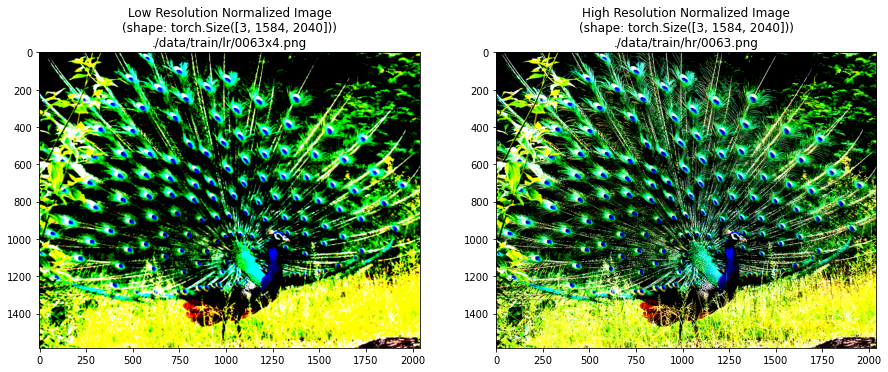

In [ ]:
idx = 62

dataset = PicturesDataset('train', trans_list=None)

pic_lr, pic_hr = dataset.__getitem__(idx)
file_lr = dataset.file_names_lr[idx]
file_hr = dataset.file_names_hr[idx]

fig, axs = plt.subplots(1,2, figsize=(15,15))

axs[0].imshow(pic_lr.permute(1,2,0))
axs[0].set_title(f'Low Resolution Normalized Image\n(shape: {pic_lr.shape})\n{file_lr}')

axs[1].imshow(pic_hr.permute(1,2,0))
axs[1].set_title(f'High Resolution Normalized Image\n(shape: {pic_hr.shape})\n{file_hr}')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


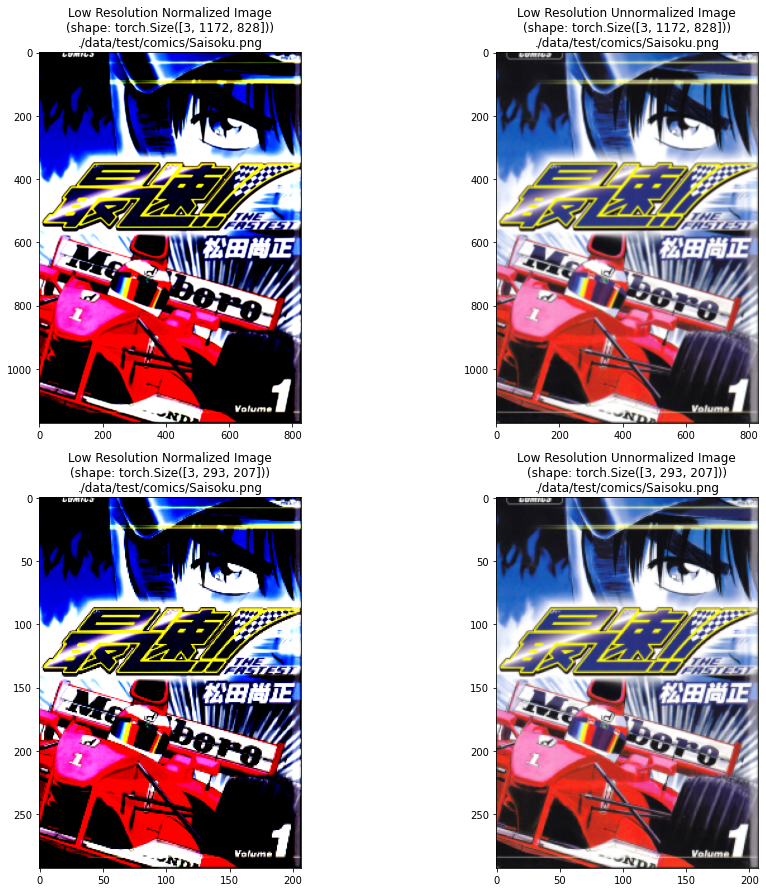

In [ ]:
idx = 77

dataset_test = PicturesDataset('test', trans_list=None)

pic_lr, pic_lr_size, pic_lr_norm_params = dataset_test.__getitem__(idx)
file_lr = dataset_test.file_names_lr[idx]

pic_lr_unnormalized = pic_lr * pic_lr_norm_params[1] + pic_lr_norm_params[0]
resize_pic = transforms.Resize([pic_lr_size[0], pic_lr_size[1]])
pic_lr_resized = resize_pic(pic_lr)
pic_lr_resized_unnormalized = resize_pic(pic_lr_unnormalized)

fig, axs = plt.subplots(2,2, figsize=(15,15))

axs[0,0].imshow(pic_lr.permute(1,2,0))
axs[0,0].set_title(f'Low Resolution Normalized Image\n(shape: {pic_lr.shape})\n{file_lr}')

axs[0,1].imshow(pic_lr_unnormalized.permute(1,2,0))
axs[0,1].set_title(f'Low Resolution Unnormalized Image\n(shape: {pic_lr_unnormalized.shape})\n{file_lr}')

axs[1,0].imshow(pic_lr_resized.permute(1,2,0))
axs[1,0].set_title(f'Low Resolution Normalized Image\n(shape: {pic_lr_resized.shape})\n{file_lr}')

axs[1,1].imshow(pic_lr_resized_unnormalized.permute(1,2,0))
axs[1,1].set_title(f'Low Resolution Unnormalized Image\n(shape: {pic_lr_resized_unnormalized.shape})\n{file_lr}')

plt.show()